with pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import platform



data = pd.read_csv('./subwaytime.csv',header = [0,1])

In [2]:
data

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5_level_0,05:00:00~05:59:59,Unnamed: 7_level_0,06:00:00~06:59:59,Unnamed: 9_level_0,...,23:00:00~23:59:59,Unnamed: 43_level_0,00:00:00~00:59:59,Unnamed: 45_level_0,01:00:00~01:59:59,Unnamed: 47_level_0,02:00:00~02:59:59,Unnamed: 49_level_0,03:00:00~03:59:59,Unnamed: 51_level_0
,Unnamed: 0_level_1,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
0,Jun-22,1호선,150,서울역,646,24,8433,7694,12608,46963,...,20385,15480,158,1332,1,4,0,1,0,0
1,Jun-22,1호선,151,시청,271,7,3133,4802,3321,23621,...,9254,2938,72,422,0,2,0,0,0,0
2,Jun-22,1호선,152,종각,91,9,4007,3960,3682,22533,...,27781,3590,315,394,0,1,0,0,0,0
3,Jun-22,1호선,153,종로3가,190,12,3882,3261,3570,14038,...,17170,4119,310,843,3,3,0,0,0,0
4,Jun-22,1호선,154,종로5가,34,0,1730,3909,2986,16406,...,6208,2628,98,668,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,Jun-22,신림선,4407,당곡,0,0,1061,118,2650,704,...,822,2710,156,637,0,0,0,0,0,0
611,Jun-22,신림선,4408,신림,2,1,651,153,853,488,...,770,2023,177,629,0,1,0,0,0,0
612,Jun-22,신림선,4409,서원,2,1,1287,151,2552,513,...,349,3281,68,782,2,2,0,0,0,0


출근 시간대 1호선 최대 하차역은 종각역이고 하차인원은 330,536명 입니다.
출근 시간대 2호선 최대 하차역은 역삼역이고 하차인원은 479,969명 입니다.
출근 시간대 3호선 최대 하차역은 양재(서초구청)역이고 하차인원은 331,279명 입니다.
출근 시간대 4호선 최대 하차역은 충무로역이고 하차인원은 208,776명 입니다.
출근 시간대 5호선 최대 하차역은 여의도역이고 하차인원은 352,602명 입니다.
출근 시간대 6호선 최대 하차역은 공덕역이고 하차인원은 134,342명 입니다.
출근 시간대 7호선 최대 하차역은 가산디지털단지역이고 하차인원은 486,420명 입니다.


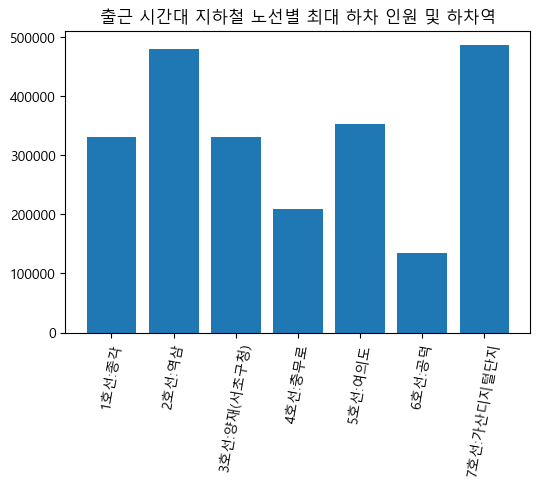

In [3]:
# 노선으로 묶고 groups로 dictionary 반환
line_ind_dic = data.groupby(data.columns[1]).groups

# 출근시간 column index 선택
chul_time_ind = data.columns[[11,13]] 

# 역이름. 최대값 저장할 리스트
label = []
max_vals = []


# 노선들 (1 ~ 7 호선)에 대해 반복
for k in list(line_ind_dic.keys())[:7]:
    
    # 각 노선의 DataFrame
    line_data = data.iloc[line_ind_dic[k]].copy().reset_index(drop = True)
    
    # 역들의 출근시간 승차객 수 합 
    chul_sum = line_data[chul_time_ind].sum(axis = 1)
    
    # 최대값 인덱스로 최대 승차객 보유 역 이름 구하기
    max_idx = chul_sum.idxmax()
    station = line_data.iloc[max_idx, 3]
    print('출근 시간대 {0} 최대 하차역은 {1}역이고 하차인원은 {2:,}명 입니다.'.format(k, station, chul_sum[max_idx]))

    # 역이름. 최대값 리스트에 추가
    label.append(k+':'+station)
    max_vals.append(chul_sum[max_idx])
    

if(platform.system() == 'Windows'):
    plt.rc('font', family = 'Malgun Gothic')
else:
    plt.rc('font', family = 'AppleGothic')
    
plt.figure(dpi = 100)
plt.bar(label, max_vals)
plt.xticks(rotation = 80)
plt.title('출근 시간대 지하철 노선별 최대 하차 인원 및 하차역')
plt.show()



without pandas

출근 시간대 1호선 최대 하차역은 종각역이고 하차인원은 330,536명 입니다.
출근 시간대 2호선 최대 하차역은 역삼역이고 하차인원은 479,969명 입니다.
출근 시간대 3호선 최대 하차역은 양재(서초구청)역이고 하차인원은 331,279명 입니다.
출근 시간대 4호선 최대 하차역은 충무로역이고 하차인원은 208,776명 입니다.
출근 시간대 5호선 최대 하차역은 여의도역이고 하차인원은 352,602명 입니다.
출근 시간대 6호선 최대 하차역은 공덕역이고 하차인원은 134,342명 입니다.
출근 시간대 7호선 최대 하차역은 가산디지털단지역이고 하차인원은 486,420명 입니다.


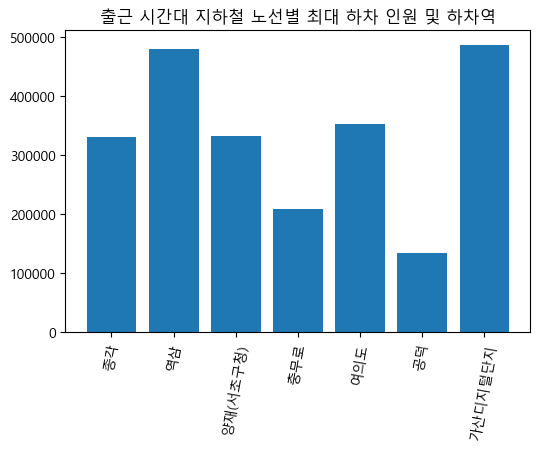

In [4]:
import csv


# 노선 리스트 생성
lines = [f'{i}호선' for i in range(1,8)]

# 노선별로 역과 최대 승차객을 저장할 dictionary 생성
lines_dic = {'역':{}, '인원수':{}}

#  {'역' : {'1호선' : '__역', '2호선' : '__역', ...}, 
#   '인원수' : {'1호선' : _____, '2호선' : ____, ...}}
for l in lines:
    lines_dic['역'][l] = ''
    lines_dic['인원수'][l] = 0

with open('./subwaytime.csv', encoding = 'utf-8-sig') as f:
    data = csv.reader(f)
    col1 = next(data)
    col2 = next(data)
    
    for row in data:
        if row[1] in lines:
            # 출근시간 승차객 합 계산
            row_sum = int(row[11]) + int(row[13])
            
            # 비교 후 처리
            if lines_dic['인원수'][row[1]] < row_sum:
                lines_dic['인원수'][row[1]] = row_sum
                lines_dic['역'][row[1]] = row[3]
                
for l in lines:
    print('출근 시간대 {0} 최대 하차역은 {1}역이고 하차인원은 {2:,}명 입니다.'.format(l, lines_dic['역'][l], lines_dic['인원수'][l]))
     
            
        
label = lines_dic['역'].values()
max_vals = lines_dic['인원수'].values()

if(platform.system() == 'Windows'):
    plt.rc('font', family = 'Malgun Gothic')
else:
    plt.rc('font', family = 'AppleGothic')
    
plt.figure(dpi = 100)
plt.bar(label, max_vals)
plt.xticks(rotation = 80)
plt.title('출근 시간대 지하철 노선별 최대 하차 인원 및 하차역')
plt.show()
    
    